In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import plotly.express as px

In [2]:
df = pd.read_csv("cancer_classification.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [4]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [5]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


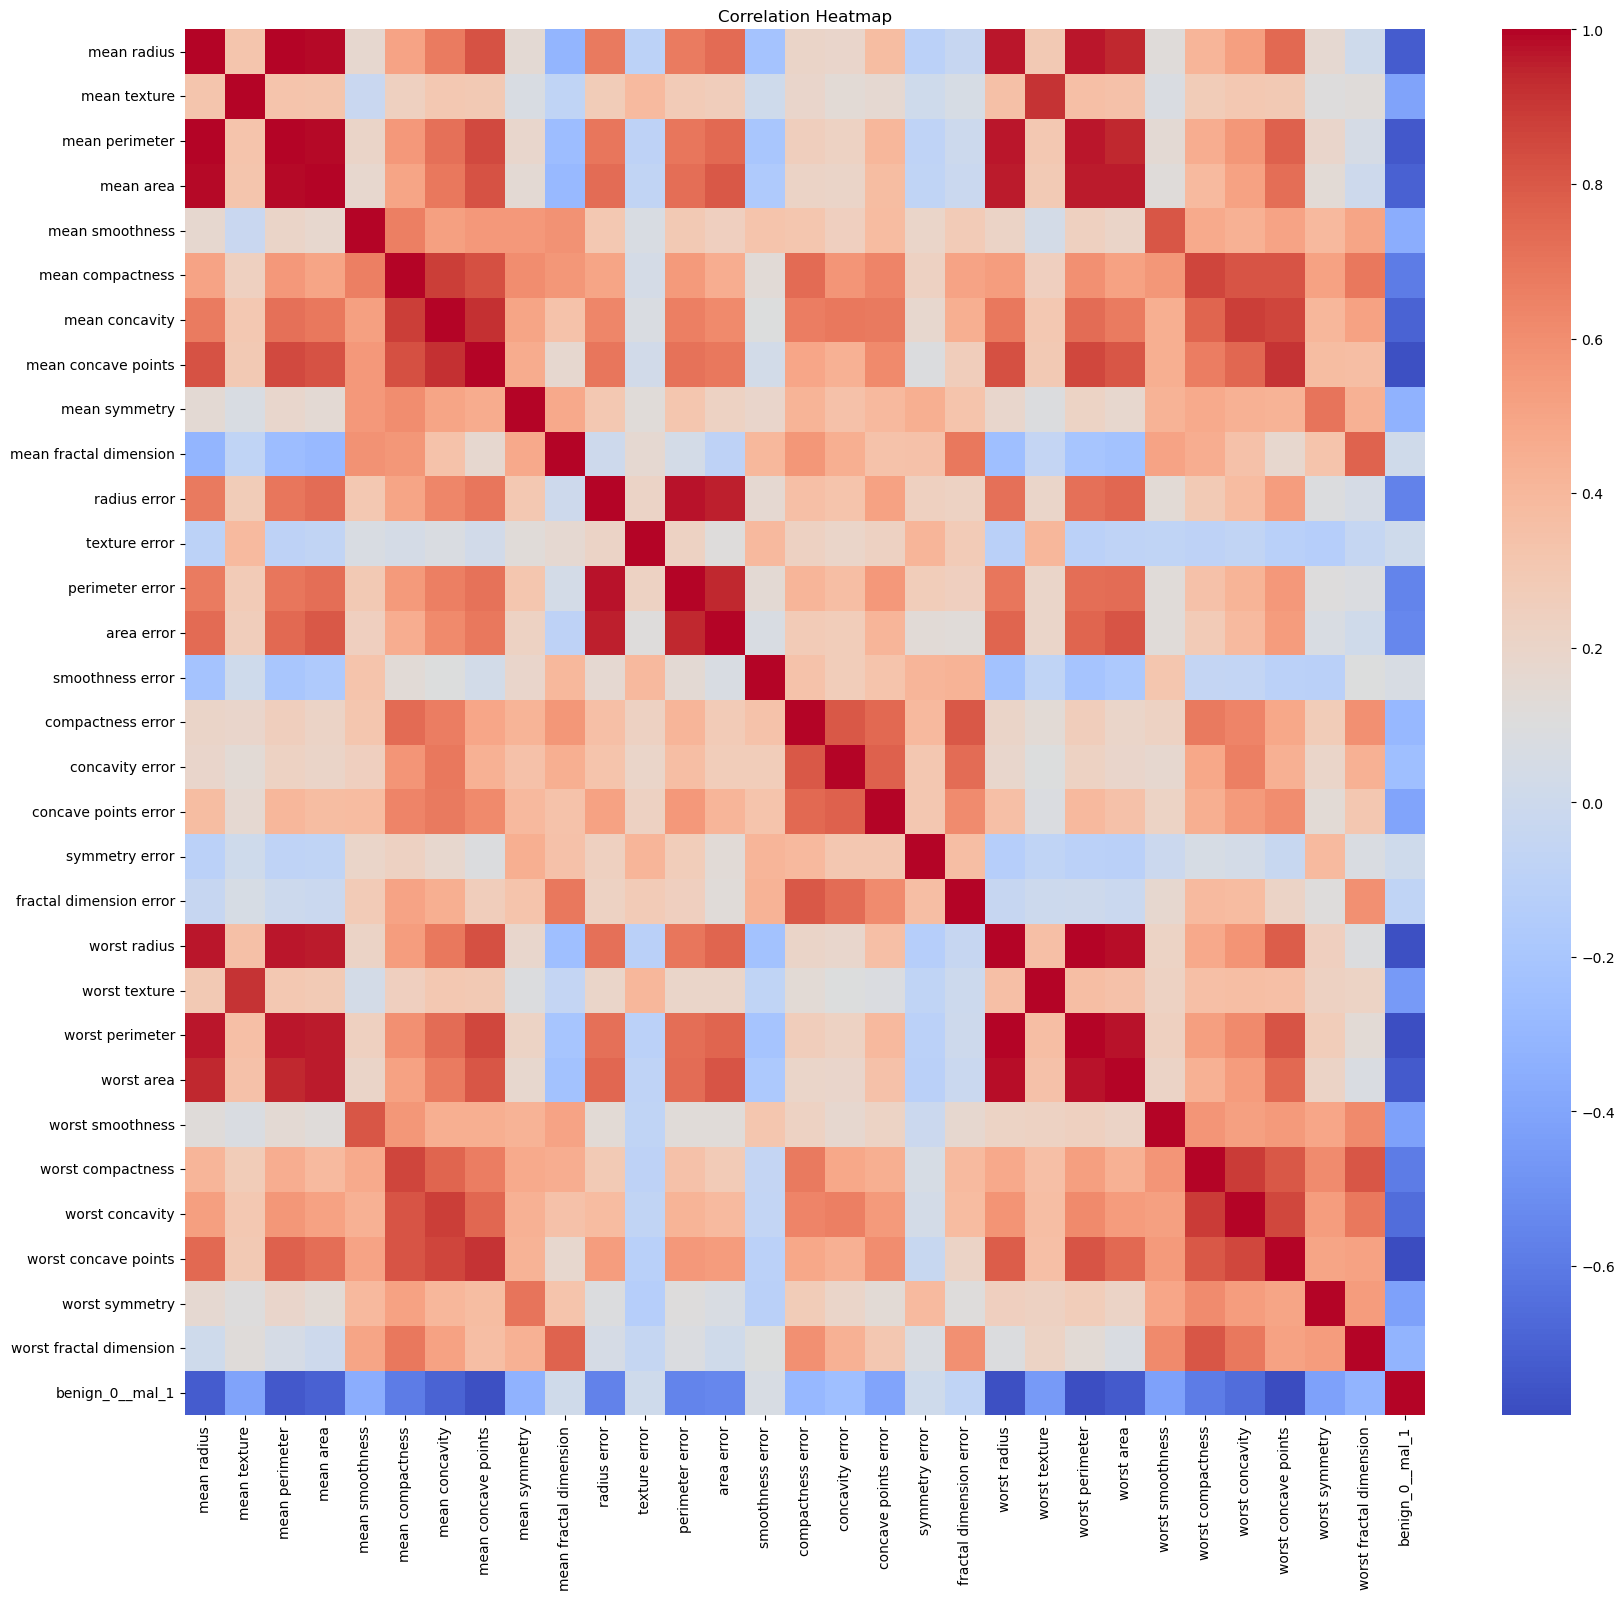

In [106]:
correlation_matrix = df.corr()
plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()

In [7]:
from sklearn.preprocessing import MinMaxScaler

In [8]:
scaler = MinMaxScaler().fit(df)
scaled_array = scaler.transform(df)
df_scaled = pd.DataFrame(scaled_array, columns=df.columns)

In [9]:
df_scaled.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.338222,0.323965,0.332935,0.216920,0.394785,0.260601,0.208058,0.243137,0.379605,0.270379,...,0.363998,0.283138,0.170906,0.404138,0.220212,0.217403,0.393836,0.263307,0.189596,0.627417
std,0.166787,0.145453,0.167915,0.149274,0.126967,0.161992,0.186785,0.192857,0.138456,0.148702,...,0.163813,0.167352,0.139932,0.150779,0.152649,0.166633,0.225884,0.121954,0.118466,0.483918
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.223342,0.218465,0.216847,0.117413,0.304595,0.139685,0.069260,0.100944,0.282323,0.163016,...,0.241471,0.167837,0.081130,0.300007,0.116337,0.091454,0.223127,0.185098,0.107700,0.000000
50%,0.302381,0.308759,0.293345,0.172895,0.390358,0.224679,0.144189,0.166501,0.369697,0.243892,...,0.356876,0.235320,0.123206,0.397081,0.179110,0.181070,0.343402,0.247782,0.163977,1.000000
75%,0.416442,0.408860,0.416765,0.271135,0.475490,0.340531,0.306232,0.367793,0.453030,0.340354,...,0.471748,0.373475,0.220901,0.494156,0.302520,0.305831,0.554639,0.318155,0.242949,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X = df_scaled.drop("benign_0__mal_1", axis = 1)
y = df_scaled['benign_0__mal_1']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
print('X_train.shape :', X_train.shape)
print('X_test.shape :', X_test.shape)
print('y_train.shape :', y_train.shape)
print('y_test.shape :', y_test.shape)

X_train.shape : (455, 30)
X_test.shape : (114, 30)
y_train.shape : (455,)
y_test.shape : (114,)


## Logistic Regression Model

In [119]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_val_score  

In [120]:
logreg = LogisticRegression(penalty='l1', solver='saga', max_iter=1000)

In [121]:
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000, penalty='l1', solver='saga')

In [122]:
y_pred = logreg.predict(X_test)

In [123]:
cv_scores = cross_val_score(logreg, X, y, cv=10, scoring='roc_auc')  # 10-fold cross-validation
print(f"Cross-Validation AUC Scores: {cv_scores}")
print(f"Mean CV AUC: {cv_scores.mean():.2f}")

/Users/sritanvemuru/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sritanvemuru/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sritanvemuru/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sritanvemuru/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sritanvemuru/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/sritanvemuru/anaconda3/

Cross-Validation AUC Scores: [0.9987013  0.96623377 0.9973545  0.99603175 1.         0.99867725
 0.96957672 1.         1.         0.99455782]
Mean CV AUC: 0.99


/Users/sritanvemuru/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [124]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

if len(logreg.classes_) == 2:
    roc_auc = roc_auc_score(y_test, logreg.predict_proba(X_test)[:, 1])
    print(f"\nROC-AUC: {roc_auc}")

Accuracy: 0.956140350877193

Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.93      0.94        43
         1.0       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114


ROC-AUC: 0.9977071732721913


In [125]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

TN, FP, FN, TP = conf_matrix.ravel()

fnr = FN / (FN + TP)
print(f"False Negative Rate (FNR): {fnr:}")


Confusion Matrix:
[[40  3]
 [ 2 69]]
False Negative Rate (FNR): 0.028169014084507043


## Support Vector Machine(SVMs) Model

In [126]:
from sklearn.svm import SVC

In [127]:
svm_model = SVC(kernel='rbf', probability=True, C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train, y_train)

SVC(probability=True, random_state=42)

In [128]:
cv_scores = cross_val_score(svm_model, X, y, cv=10, scoring='roc_auc')  # 10-fold cross-validation
print(f"Cross-Validation AUC Scores: {cv_scores}")
print(f"Mean CV AUC: {cv_scores.mean():.2f}")

Cross-Validation AUC Scores: [1.         0.99350649 0.99603175 0.99867725 1.         1.
 0.97619048 1.         1.         0.99591837]
Mean CV AUC: 1.00


In [129]:
y_pred = svm_model.predict(X_test)
y_prob = svm_model.predict_proba(X_test)[:, 1]

In [130]:
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
print(f"Accuracy: {accuracy:}")
print(f"ROC-AUC: {roc_auc:}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9736842105263158
ROC-AUC: 0.9967245332459875

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.95      0.96        43
         1.0       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [131]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

TN, FP, FN, TP = conf_matrix.ravel()

fnr = FN / (FN + TP)
print(f"False Negative Rate (FNR): {fnr:}")


Confusion Matrix:
[[41  2]
 [ 1 70]]
False Negative Rate (FNR): 0.014084507042253521


## Random Forest Model

In [132]:
from sklearn.ensemble import RandomForestClassifier

In [133]:
rf_model = RandomForestClassifier(
    n_estimators=100, 
    max_depth=None,   
    random_state=42,
    class_weight='balanced'  
)

In [134]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [135]:
cv_scores = cross_val_score(rf_model, X, y, cv=10, scoring='roc_auc')  # 10-fold cross-validation
print(f"Cross-Validation AUC Scores: {cv_scores}")
print(f"Mean CV AUC: {cv_scores.mean():.2f}")

Cross-Validation AUC Scores: [1.         0.97077922 0.99074074 0.96296296 1.         0.99867725
 0.98941799 1.         0.9973545  1.        ]
Mean CV AUC: 0.99


In [136]:
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]

In [137]:
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f"Accuracy: {accuracy:}")
print(f"ROC-AUC: {roc_auc:}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9736842105263158
ROC-AUC: 0.9983622666229938

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.95      0.96        43
         1.0       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [138]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

TN, FP, FN, TP = conf_matrix.ravel()

fnr = FN / (FN + TP)
print(f"False Negative Rate (FNR): {fnr:}")


Confusion Matrix:
[[41  2]
 [ 1 70]]
False Negative Rate (FNR): 0.014084507042253521


In [139]:
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)
importance_df

,feature,importance
23,worst area,0.139065
7,mean concave points,0.118462
27,worst concave points,0.114405
22,worst perimeter,0.092378
20,worst radius,0.077126
6,mean concavity,0.072469
0,mean radius,0.050456
3,mean area,0.048804
2,mean perimeter,0.046564
26,worst concavity,0.040300


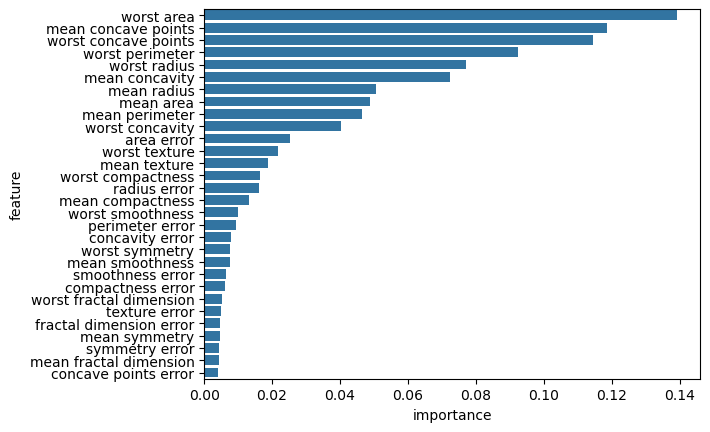

In [140]:
sns.barplot(data=importance_df, x='importance', y='feature');

## K-Nearest Neighbors Classification

In [141]:
from sklearn.neighbors import KNeighborsClassifier

In [142]:
knn_model = KNeighborsClassifier(
    n_neighbors=5,  
    metric='minkowski',  
    p=2 
)

In [143]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [144]:
cv_scores = cross_val_score(knn_model, X, y, cv=10, scoring='accuracy')  # 10-fold cross-validation
print(f"Cross-Validation Accuracy Scores: {cv_scores}")

Cross-Validation Accuracy Scores: [0.96491228 0.94736842 0.92982456 0.98245614 1.         0.98245614
 0.92982456 0.98245614 0.96491228 0.98214286]


In [145]:
y_pred = knn_model.predict(X_test)
y_prob = knn_model.predict_proba(X_test)[:, 1]

In [146]:
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f"Accuracy: {accuracy:}")
print(f"ROC-AUC: {roc_auc:}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9649122807017544
ROC-AUC: 0.9834588928922371

Classification Report:
              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95        43
         1.0       0.97      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [147]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

TN, FP, FN, TP = conf_matrix.ravel()

fnr = FN / (FN + TP)
print(f"False Negative Rate (FNR): {fnr:}")


Confusion Matrix:
[[41  2]
 [ 2 69]]
False Negative Rate (FNR): 0.028169014084507043


## Naive Bayes

In [148]:
from sklearn.naive_bayes import GaussianNB

In [149]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [150]:
cv_scores = cross_val_score(nb_model, X, y, cv=10, scoring='accuracy')  # 10-fold cross-validation
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.2f}")

Cross-Validation Accuracy Scores: [0.94736842 0.87719298 0.89473684 0.92982456 0.92982456 0.98245614
 0.92982456 0.96491228 0.89473684 0.96428571]
Mean CV Accuracy: 0.93


In [151]:
y_pred = nb_model.predict(X_test)
y_prob = nb_model.predict_proba(X_test)[:, 1]

In [152]:
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f"Accuracy: {accuracy:}")
print(f"ROC-AUC: {roc_auc:}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9649122807017544
ROC-AUC: 0.9973796265967901

Classification Report:
              precision    recall  f1-score   support

         0.0       0.98      0.93      0.95        43
         1.0       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [153]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

TN, FP, FN, TP = conf_matrix.ravel()

fnr = FN / (FN + TP)
print(f"False Negative Rate (FNR): {fnr:}")


Confusion Matrix:
[[40  3]
 [ 1 70]]
False Negative Rate (FNR): 0.014084507042253521
